## Hierarchical Clustering

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import silhouette_score

### Load Dataset

In [2]:
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df_IDNumber=df['ID#']

### Droping the categorical feature

In [4]:
df.drop('ID#',axis=1,inplace=True)
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


### Scaling the numeric features

In [5]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)

In [6]:
np.round(df_scaled.describe(),2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.00,3999.00,3999.00,3999.00,3999.00,3999.00,3999.00,3999.00,3999.00,3999.00,3999.00
mean,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.73,-0.19,-0.77,-0.10,-0.06,-0.71,-1.21,-0.33,-0.36,-1.99,-0.77
25%,-0.55,-0.19,-0.77,-0.10,-0.06,-0.66,-0.90,-0.33,-0.36,-0.87,-0.77
50%,-0.30,-0.19,-0.77,-0.10,-0.06,-0.41,0.04,-0.33,-0.36,-0.01,-0.77
75%,0.19,-0.19,0.68,-0.10,-0.06,0.28,0.56,-0.11,-0.10,0.81,1.30
max,16.19,14.22,2.14,13.45,20.43,10.21,7.75,21.68,13.61,2.02,1.30


### Silhouette Score

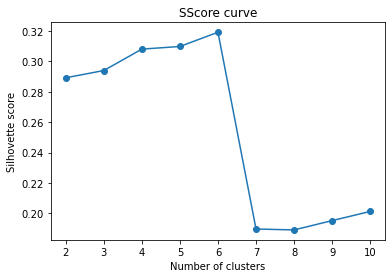

In [7]:
ss=[]
for i in range(2,11):
    ag=AgglomerativeClustering(n_clusters=i,linkage='ward')
    ag.fit(df_scaled)
    ss.append(silhouette_score(df_scaled,ag.labels_))

plt.plot(range(2,11),ss,marker='o')
plt.title("SScore curve")
plt.xlabel("Number of clusters")
plt.ylabel("Silhovette score");

### Since the silhouette score is maximum for 6 clusters will choose no of clusters as 6 and perform hierarchical clustering

### Building  Hierarchical Clustering Model 

In [8]:
agglo=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
agglo.fit(df_scaled)
cluster_labels=agglo.labels_

In [9]:
df['cluster_labels_agglo']=cluster_labels
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_labels_agglo
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [10]:
df.groupby("cluster_labels_agglo").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster_labels_agglo,,,,,,,,,,,
0,46329.336877,9.028618,1.244072,1.000000,1.000000,4868.112428,6.907604,214.812756,0.673753,3769.337694,0.184383
1,116758.363636,37.024351,3.672890,1.000000,1.000000,38535.185065,18.683442,339.391234,1.029221,4756.469968,0.672078
2,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000
5,110219.330769,3502.323077,1.861538,1.000000,1.000000,17226.661538,11.092308,727.153846,2.269231,4161.053846,0.600000


## From the above profile we can say that the people in cluster 2 has more balance of miles which are eligible for reward travel and people in cluster 4 are earning more rewards compared to the other cluster people with the use of their credit card and the cluster 2 people are more frequent travellers.

## KMeans Clustering

### Silhouette Score

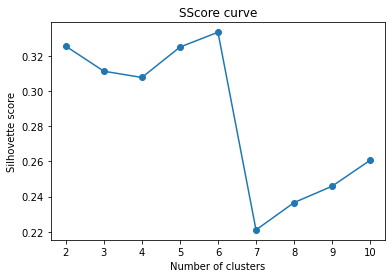

In [11]:
ss_kmeans=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df_scaled)
    ss_kmeans.append(silhouette_score(df_scaled,kmeans.labels_))

    
plt.plot(range(2,11),ss_kmeans,marker='o')
plt.title("SScore curve")
plt.xlabel("Number of clusters")
plt.ylabel("Silhovette score");

### The Silhouette score is maximum for 6 clusters will choose no of clusters as 6 and perform KMeans clustering

### Building  KMeans Clustering Model 

In [12]:
km=KMeans(n_clusters=6,random_state=42)
km.fit(df_scaled)
df["cluster_labels_kmeans"]=km.labels_

In [13]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_labels_agglo,cluster_labels_kmeans
0,28143,0,1,1,1,174,1,0,0,7000,0,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0


In [14]:
df.groupby('cluster_labels_kmeans').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_labels_agglo
cluster_labels_kmeans,,,,,,,,,,,,
0,117252.014354,60.495215,3.704944,1.000000,1.001595,39256.378788,18.760766,347.125997,1.037480,4896.791866,0.649123,1.003987
1,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203,1.811189
2,43519.741845,42.457511,1.226742,1.000000,1.000403,4605.759162,6.825614,198.250503,0.616593,3696.446234,0.198953,0.134515
3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,4.000000
4,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377,4.950820
5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,3.000000


### From the above profile we can say that the people in cluster 1 has more balance of miles which are eligible for reward travel and the people in cluster 3 are earning more rewards compared to the other cluster people with the use of their credit card and the people in cluster 1 are more frequent travellers.

## DBSCAN Clustering

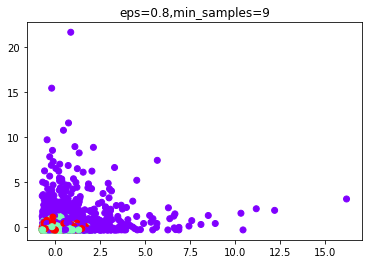

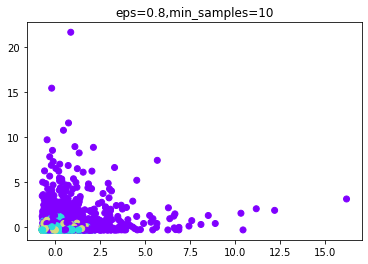

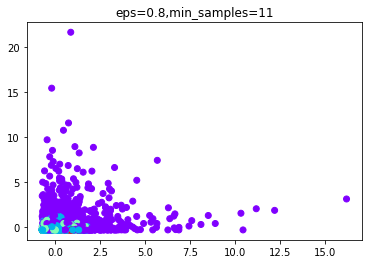

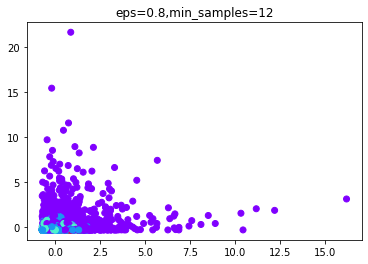

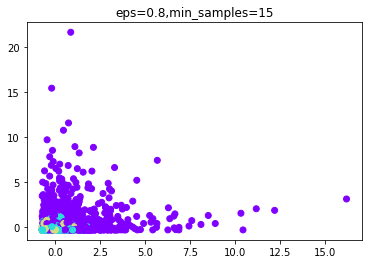

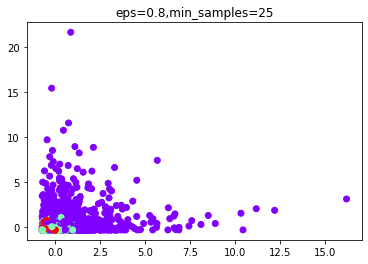

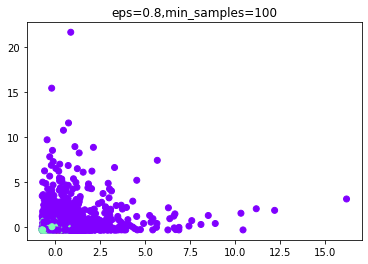

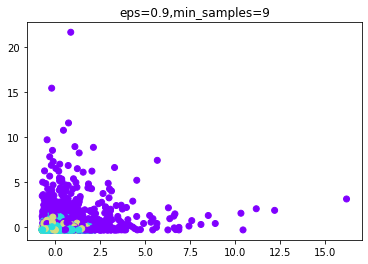

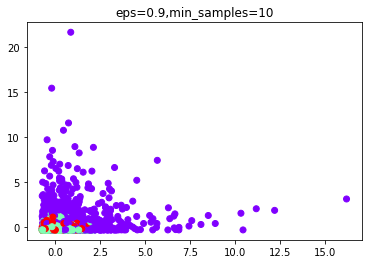

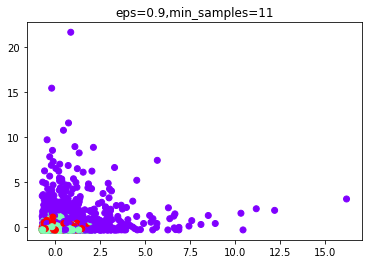

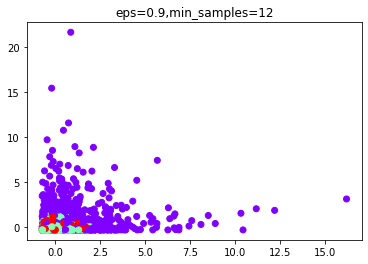

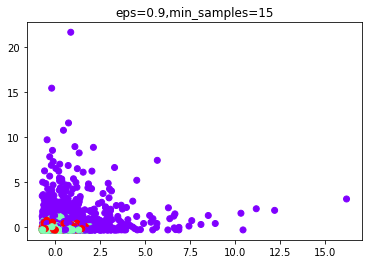

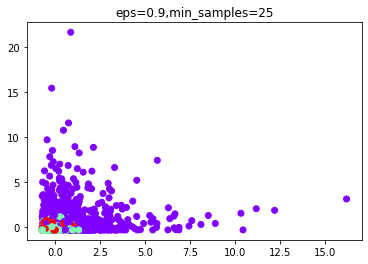

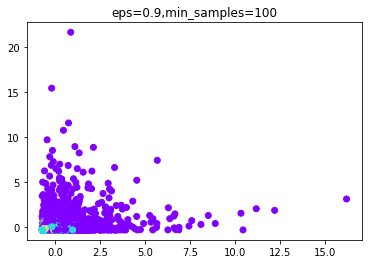

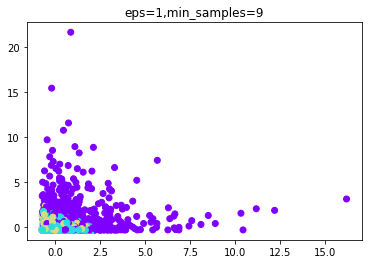

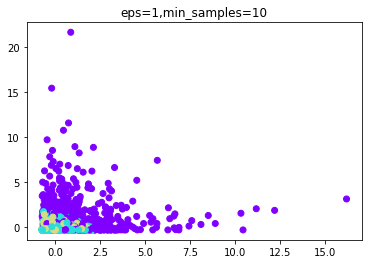

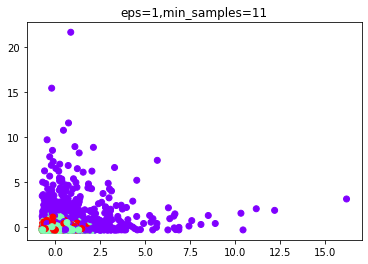

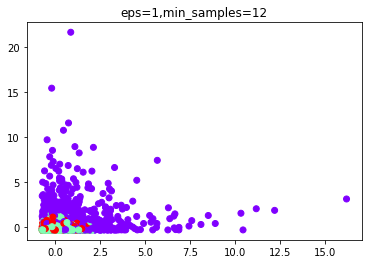

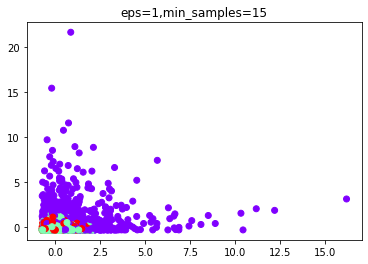

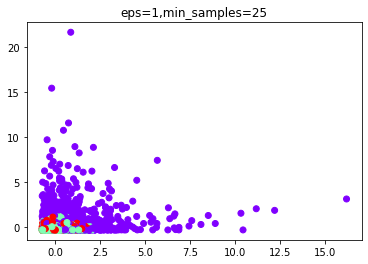

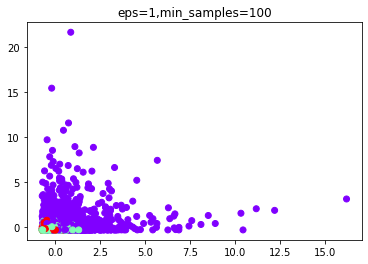

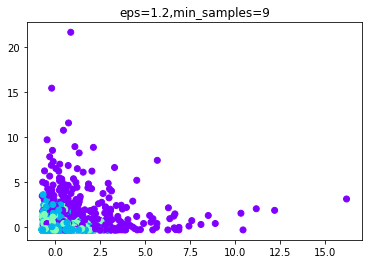

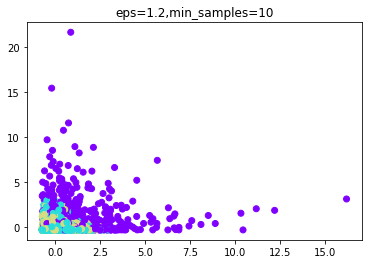

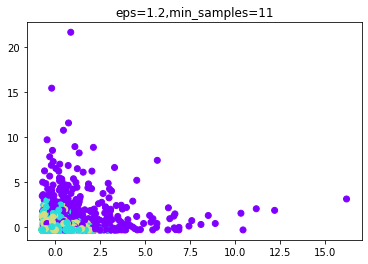

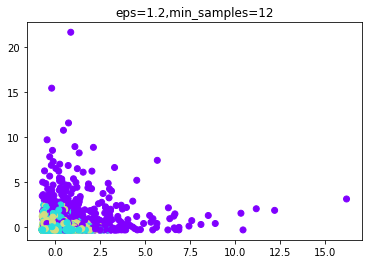

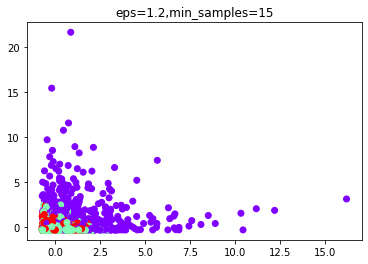

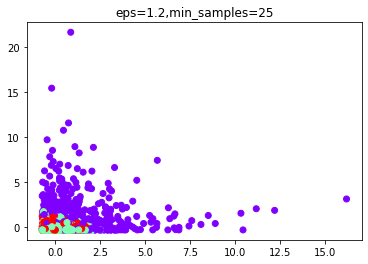

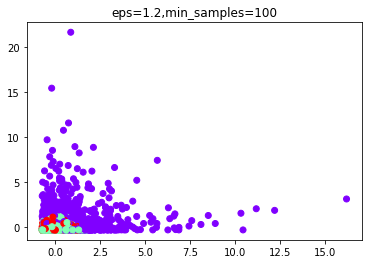

In [15]:
epsilon=[0.8,0.9,1,1.2]
samples=[9,10,11,12,15,25,100]
for e in epsilon :
    for s in samples:
        dbscan=DBSCAN(eps=e,min_samples=s)
        labels_dbscan=dbscan.fit_predict(df_scaled)
        plt.scatter(df_scaled["Balance"],df_scaled["Flight_miles_12mo"],c=labels_dbscan,cmap="rainbow")
        plt.title("eps={},min_samples={}".format(e,s))
        plt.show()

### since foe eps 1.2 and min samples 15 the dbscan is able to cluster better will choose these values and perform building the DBSCAN model

### Building  DBSCAN Clustering Model 

In [16]:
dbscan=DBSCAN(eps=1.2,min_samples=15)
dbscan.fit(df_scaled)
labels_dbscan=dbscan.fit_predict(df_scaled)

In [17]:
np.unique(labels_dbscan)

array([-1,  0,  1], dtype=int64)

In [18]:
df['cluster_labels_dbscan']=labels_dbscan

In [19]:
df.groupby("cluster_labels_dbscan").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_labels_agglo,cluster_labels_kmeans
cluster_labels_dbscan,,,,,,,,,,,,,
-1,181004.964789,967.783451,2.575704,1.102113,1.086268,37252.334507,21.375000,2190.774648,6.327465,4654.089789,0.665493,2.165493,1.419014
0,53649.657216,6.338488,1.671392,1.000000,1.000000,9228.797251,8.520189,123.665378,0.396478,3806.569588,0.000000,0.167096,1.666667
1,60402.980054,10.749773,2.612874,1.000000,1.000000,23497.981868,13.073436,278.794198,0.884859,4501.271079,1.000000,0.656392,0.840435


### From the above profile we can say that the people in cluster 1 has more balance of miles which are eligible for reward travel and the people in cluster 1 are earning more rewards compared to the other cluster people with the use of their credit card except outliers and the people in cluster 1 are more frequent travellers.